In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates

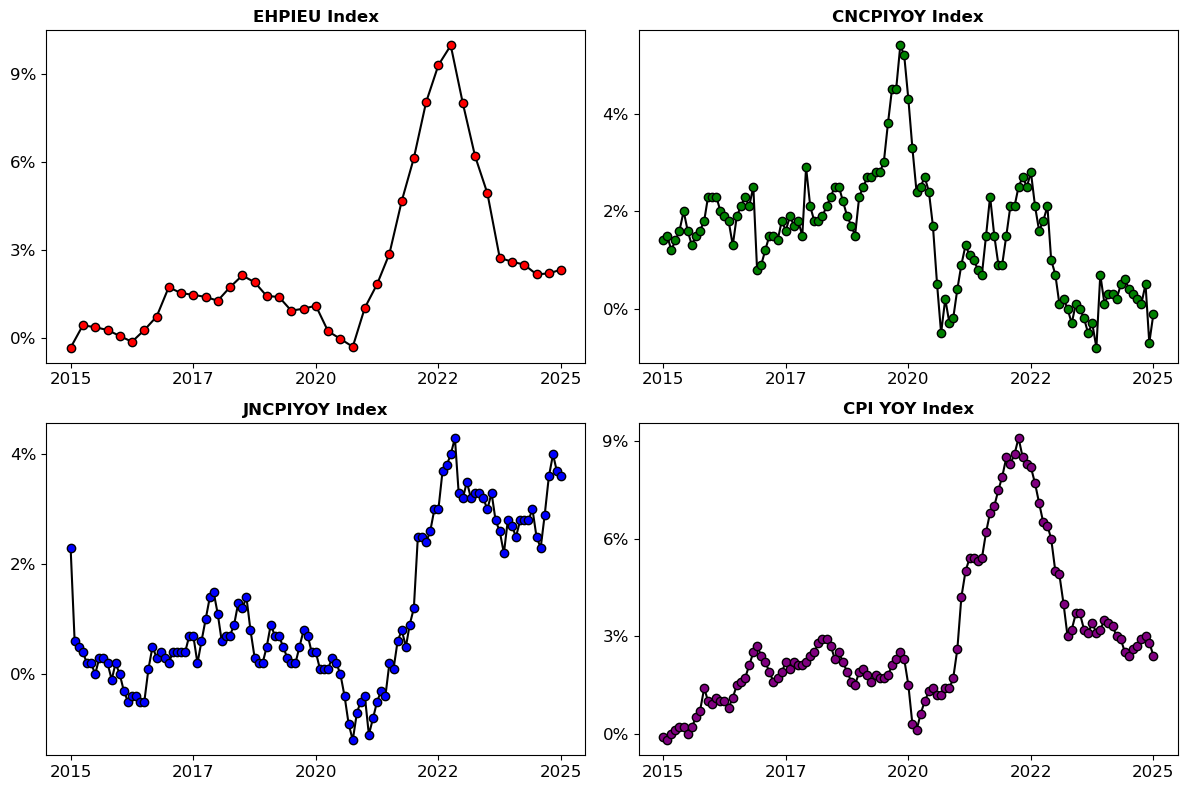

In [2]:
cpi_df = pd.read_csv("CPI.csv")

cpi_df['date'] = pd.to_datetime(cpi_df['date'])
index_list = cpi_df['security'].unique()
colors = ['red', 'green', 'blue', 'purple']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

dfs = []

for i, (index, color) in enumerate(zip(index_list, colors)):
    ax = axes[i]
    df = cpi_df[cpi_df['security'] == index].copy()
    dfs.append(df)

    ax.plot(df['date'], df['PX_LAST'], marker='o', color='black', markerfacecolor=color)

    ax.tick_params(labelsize=12)
    ax.set_title(index, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=0))

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    tick_dates = pd.date_range(start=start_date, end=end_date, periods=5)
    ax.set_xticks(tick_dates)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for j in range(len(index_list), 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import psf_library.cleaning as psf_clean
import psf_library.plotting as psf_plot

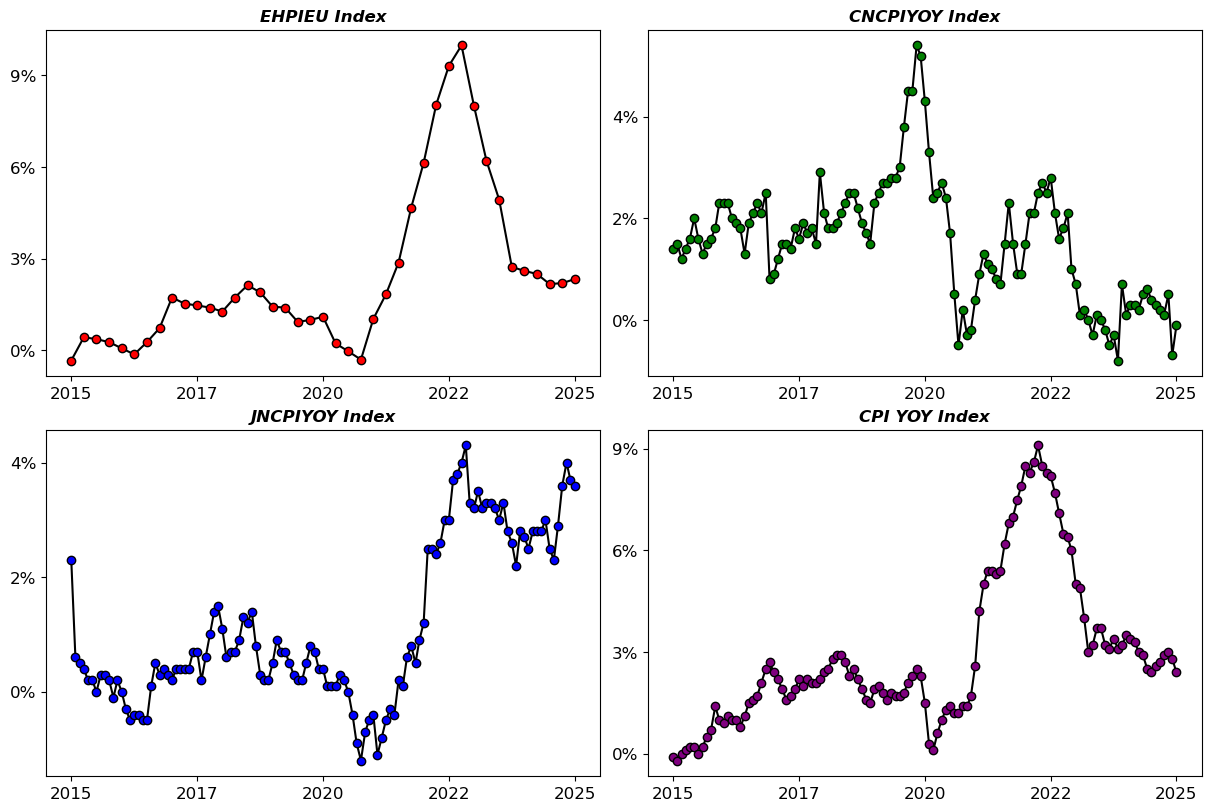

In [4]:
cpi_df = pd.read_csv("CPI.csv")
index_list = psf_clean.unique_values(cpi_df, 'security')

prepared_dataframes = psf_clean.prep_dfs(cpi_df, index_list, 'PX_LAST')

colors = ['red', 'green', 'blue', 'purple']
fig, axes, dfs = psf_plot.plot_scatter_lines(index_list, colors, prepared_dataframes, 'PX_LAST', 'date', 2, 2, (12,8), 'o')

for ax, df, index in zip(axes, dfs, index_list):
    psf_plot.style_axes_date(ax, df, index, 'percent', 5, '%Y')

In [5]:
import psf_library.cleaning as psf_clean 
import psf_library.calcs as psf_calc
import pandas as pd
import numpy as np

In [6]:
returns_df = pd.read_csv('10Y_Daily_Returns.csv')
returns_df

,date,SPX Index,SPW Index,MXEA Index,MXWOU Index
0,2015-06-01,0.002160,0.001531,-0.004005,-0.003767
1,2015-06-02,-0.000956,0.000282,0.006633,0.006924
2,2015-06-03,0.002306,0.001293,0.007195,0.006880
3,2015-06-04,-0.008607,-0.008954,-0.006884,-0.007195
4,2015-06-05,-0.001395,0.000279,-0.019839,-0.018510
...,...,...,...,...,...
2605,2025-05-26,0.000000,0.000000,0.010635,0.010455
2606,2025-05-27,0.020543,0.018210,-0.001083,-0.000320
2607,2025-05-28,-0.005560,-0.008963,-0.007636,-0.007189
2608,2025-05-29,0.004027,0.003032,0.006744,0.005677


In [7]:
returns = returns_df[['date', 'SPX Index']].copy()

df = pd.DataFrame(returns)
returns_col = df.columns[1]
    
df = df.copy()
df.set_index('date', inplace=True)
returns = df[returns_col]

cumulative_return = (1 + returns).cumprod() - 1
total_return = cumulative_return.iloc[-1]

n_days = len(returns)
annualized_return = (1 + total_return) ** (252 / n_days) - 1

volatility = returns.std() * np.sqrt(252)

sharpe_ratio = (annualized_return - 0.03) / volatility

final_df = pd.DataFrame({
    'cumulative_return': cumulative_return,
    'annualized_return': [annualized_return] * len(returns),
    'volatility': [volatility] * len(returns),
    'sharpe_ratio': [sharpe_ratio] * len(returns)
})

final_df.tail(1)

,cumulative_return,annualized_return,volatility,sharpe_ratio
date,,,,
2025-05-30,2.348587,0.123767,0.180937,0.518231


In [8]:
split = psf_clean.split_columns_to_dfs(returns_df, 'date')
psf_calc.compute_returns(split['SPX Index'], 0.03).tail(1)

,cumulative_return,annualized_return,volatility,sharpe_ratio
date,,,,
2025-05-30,2.348587,0.123767,0.180937,0.518231
